# COUNTRIES OF THE WORLD DATASET

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

# Importing the dataset
info = pd.read_csv('countries of the world.csv')

In [73]:
info

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


# DATA-PREPROCESSING AND VISUALIZATION

In [74]:
info.drop([121], inplace = True ) #dropping the country of Luxembourg as it acts as an outlier with gdp>50000

In [75]:
info.isnull().sum() #missing values in the columns

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               21
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [76]:
info['Climate'].fillna(info['Climate'].mode(), inplace=True) #mode used beacuse of climate column being encoded

In [77]:
info['Climate']

0      1.0
1      3.0
2      1.0
3      2.0
4      3.0
      ... 
222    3.0
223    1.0
224    1.0
225    2.0
226    2.0
Name: Climate, Length: 226, dtype: float64

In [78]:
info.fillna(info.median(), inplace=True)  # filling missing values with the median of the column

In [79]:
info.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

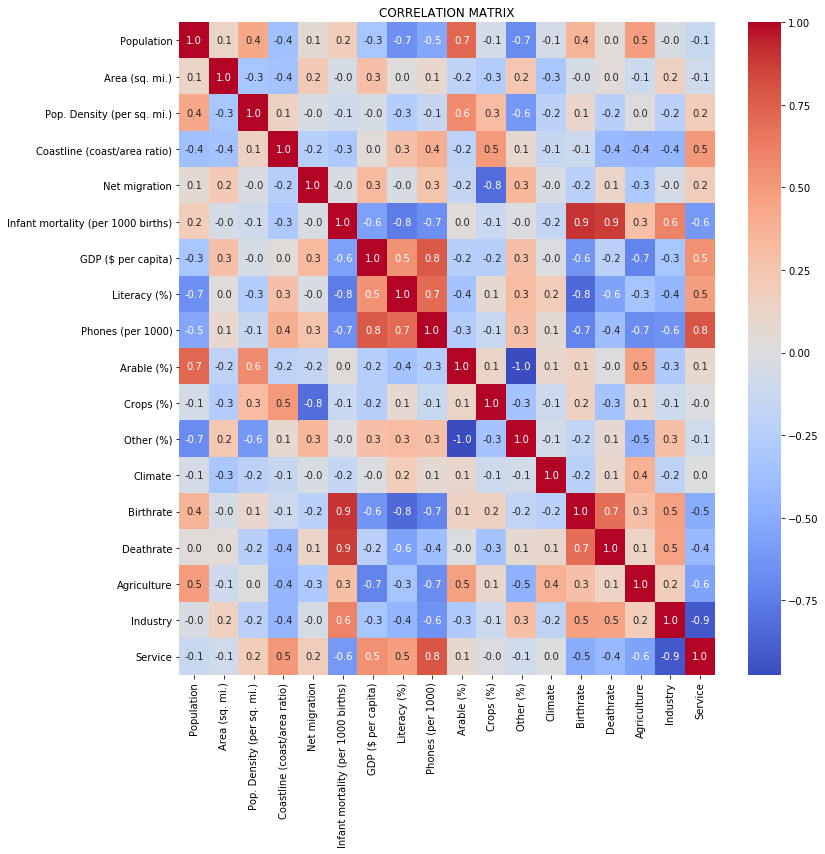

In [80]:
plt.figure(figsize=(12,12))    
ax = plt.axes()
sns.heatmap(data=info.iloc[2:18].corr(),annot=True,cmap='coolwarm',fmt='.1f')
ax.set_title('CORRELATION MATRIX')

plt.show() #shows correlation between differnt attributes of the dataset

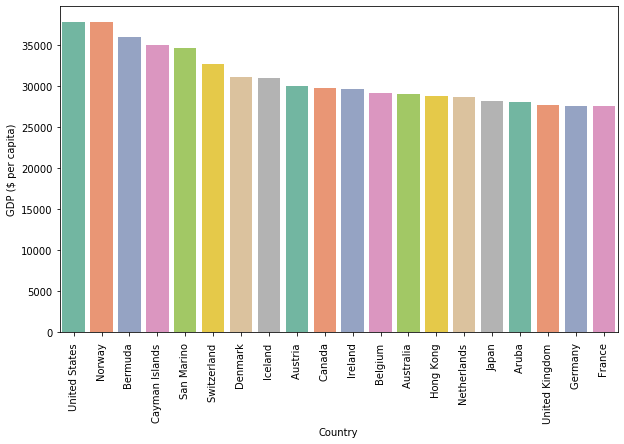

In [81]:
fig = plt.subplots(figsize=(10,6)) 
top_gdp_countries = info.sort_values('GDP ($ per capita)',ascending=False).head(20) 
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries, palette='Set2')
plt.xticks(rotation=90) 
plt.show()   # shows top 20 countries by their Gdp

# K-MEANS

In [82]:
X = info.iloc[:,[8,9]].values

The columns taken for clustering are GDP and literacy rate of a country.
The point of choosing these columns is that GDP and literacy are both varied for different countries all around the world.


In [83]:
X

array([[7.00e+02, 3.60e+01],
       [4.50e+03, 8.65e+01],
       [6.00e+03, 7.00e+01],
       [8.00e+03, 9.70e+01],
       [1.90e+04, 1.00e+02],
       [1.90e+03, 4.20e+01],
       [8.60e+03, 9.50e+01],
       [1.10e+04, 8.90e+01],
       [1.12e+04, 9.71e+01],
       [3.50e+03, 9.86e+01],
       [2.80e+04, 9.70e+01],
       [2.90e+04, 1.00e+02],
       [3.00e+04, 9.80e+01],
       [3.40e+03, 9.70e+01],
       [1.67e+04, 9.56e+01],
       [1.69e+04, 8.91e+01],
       [1.90e+03, 4.31e+01],
       [1.57e+04, 9.74e+01],
       [6.10e+03, 9.96e+01],
       [2.91e+04, 9.80e+01],
       [4.90e+03, 9.41e+01],
       [1.10e+03, 4.09e+01],
       [3.60e+04, 9.80e+01],
       [1.30e+03, 4.22e+01],
       [2.40e+03, 8.72e+01],
       [6.10e+03, 9.24e+01],
       [9.00e+03, 7.98e+01],
       [7.60e+03, 8.64e+01],
       [1.60e+04, 9.78e+01],
       [1.86e+04, 9.39e+01],
       [7.60e+03, 9.86e+01],
       [1.10e+03, 2.66e+01],
       [1.80e+03, 8.53e+01],
       [6.00e+02, 5.16e+01],
       [1.90e+

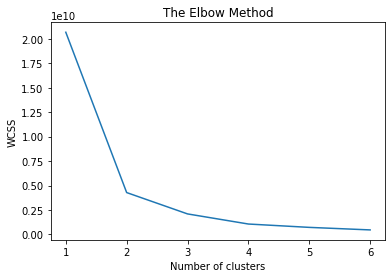

In [84]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300,n_init=10,random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#elbow method finds the optimal number of clusters for the clustering algorithm.

In [85]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [86]:
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1])

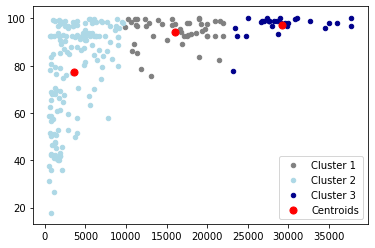

In [87]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'grey', label = 'Cluster 1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'lightblue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'darkblue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red', label = 'Centroids')
plt.legend()
plt.show()


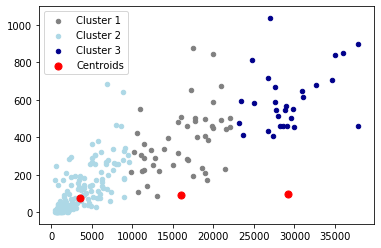

In [88]:
A = info.iloc[:,[8,10]].values
plt.scatter(A[y_kmeans == 0, 0], A[y_kmeans == 0, 1], s = 20, c = 'grey', label = 'Cluster 1') 
plt.scatter(A[y_kmeans == 1, 0], A[y_kmeans == 1, 1], s = 20, c = 'lightblue', label = 'Cluster 2')
plt.scatter(A[y_kmeans == 2, 0], A[y_kmeans == 2, 1], s = 20, c = 'darkblue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red', label = 'Centroids')
plt.legend()
plt.show()


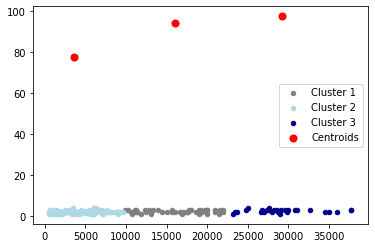

In [89]:
B = info.iloc[:,[8,14]].values
plt.scatter(B[y_kmeans == 0, 0], B[y_kmeans == 0, 1], s = 20, c = 'grey', label = 'Cluster 1') 
plt.scatter(B[y_kmeans == 1, 0], B[y_kmeans == 1, 1], s = 20, c = 'lightblue', label = 'Cluster 2')
plt.scatter(B[y_kmeans == 2, 0], B[y_kmeans == 2, 1], s = 20, c = 'darkblue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

Their is a common convention of listing countries as first world,second world or third world countries.

CLUSTER1- Countries with Gdp between 0 and 10000 where literacy varies from 10% to 99%.


CLUSTER2- Countries with Gdp between 10000 and 22500 where literacy varies from 75% to 100%.


CLUSTER3- Countries with Gdp between 22500 and 40000 where literacy varies from 85% to 100%.

# Hierarchical Clustering

# 1.ward Linkage

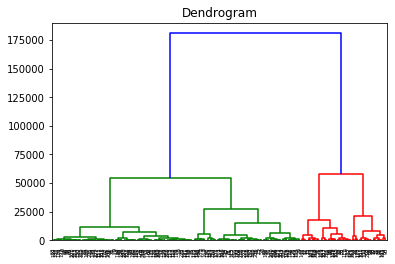

In [102]:
import scipy.cluster.hierarchy as sch
plt.figure
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [91]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
#dendrogram = sch.dendrogram(hc)
y_hc = hc.fit_predict(X)
y_hc = np.array(y_hc)
y_hc


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0], dtype=int64)

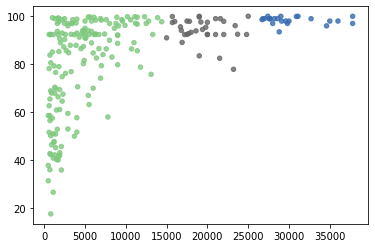

In [92]:
plt.scatter(info['GDP ($ per capita)'],info['Literacy (%)'],c=y_hc,s=20,cmap='Accent',alpha=0.8)

# 2. Complete Linkage

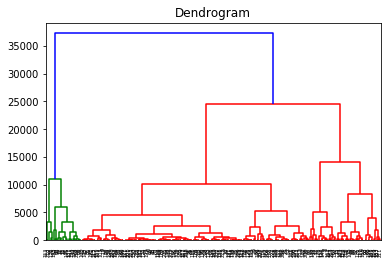

In [103]:
import scipy.cluster.hierarchy as sch
plt.figure
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.show()

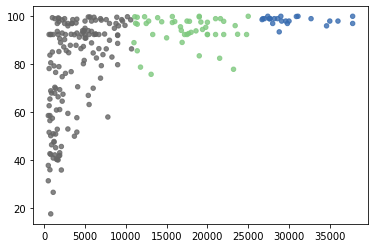

In [93]:
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
#dendrogram = sch.dendrogram(hc)
y_hc1 = hc1.fit_predict(X)
y_hc1 = np.array(y_hc1)
y_hc1

plt.scatter(info['GDP ($ per capita)'],info['Literacy (%)'],c=y_hc1,s=20,cmap='Accent',alpha=0.8)

# Single Linkage

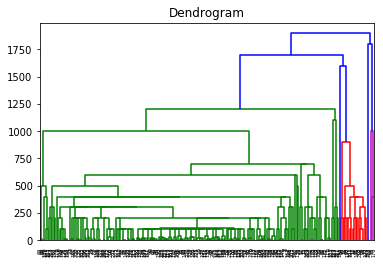

In [104]:
import scipy.cluster.hierarchy as sch
plt.figure
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.show()

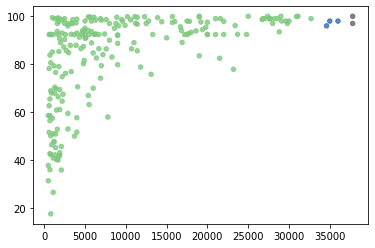

In [94]:
from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
#dendrogram = sch.dendrogram(hc)
y_hc2 = hc2.fit_predict(X)
y_hc2 = np.array(y_hc2)
y_hc2

plt.scatter(info['GDP ($ per capita)'],info['Literacy (%)'],c=y_hc2,s=20,cmap='Accent',alpha=0.8)

# Average Linkage

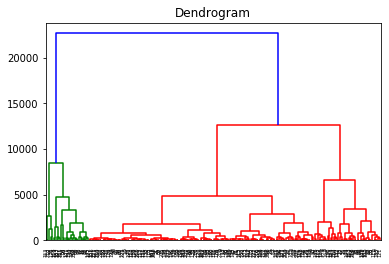

In [105]:
import scipy.cluster.hierarchy as sch
plt.figure
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.show()

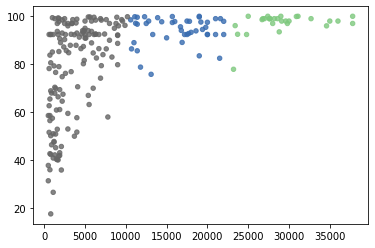

In [95]:
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
#dendrogram = sch.dendrogram(hc)
y_hc3 = hc3.fit_predict(X)
y_hc3 = np.array(y_hc3)
y_hc3

plt.scatter(info['GDP ($ per capita)'],info['Literacy (%)'],c=y_hc3,s=20,cmap='Accent',alpha=0.8)

# K=3

# PERFORMANCE MEASURES

# 1.Davis-Bouldin Score and Silhouette Score for Kmeans

In [96]:
sklearn.metrics.davies_bouldin_score(X, kmeans.labels_)

0.46769074885431744

Score is close to 0 so the clustering is good.

In [97]:

sklearn.metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=None, random_state=None)

0.6762508964423972

The score is well above point of inflection and very close to 1, so clustering is good.

# Davis-Bouldin Score and Silhouette Score for Ward Linkage

In [98]:
sklearn.metrics.davies_bouldin_score(X, hc.labels_)

0.4181635379917909

In [101]:
sklearn.metrics.silhouette_score(X, hc.labels_, metric='euclidean', sample_size=None, random_state=None)

0.6805493036190379

# Davis-Bouldin Score and Silhouette Score for Complete Linkage

In [106]:
print(sklearn.metrics.davies_bouldin_score(X, hc1.labels_))
print(sklearn.metrics.silhouette_score(X, hc1.labels_, metric='euclidean', sample_size=None, random_state=None))

0.4547153493238892
0.6823723680134716


#  Davis-Bouldin Score and Silhouette Score for Single Linkage

In [107]:
print(sklearn.metrics.davies_bouldin_score(X, hc2.labels_))
print(sklearn.metrics.silhouette_score(X, hc2.labels_, metric='euclidean', sample_size=None, random_state=None))

0.2782252425232641
0.5466567910702247


#  Davis-Bouldin Score and Silhouette Score for Average Linkage

In [108]:
print(sklearn.metrics.davies_bouldin_score(X, hc3.labels_))
print(sklearn.metrics.silhouette_score(X, hc3.labels_, metric='euclidean', sample_size=None, random_state=None))

0.46229500897585013
0.6780324257002645


# DUNN INDEX

In [64]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = (np.min(deltas)/np.max(big_deltas))*15
    return di
    
    
def  big_s(x, center):
    len_x = len(x)
    total = 0
        
    for i in range(len_x):
        total += np.linalg.norm(x[i]-center)    
    
    return total/len_x

def davisbouldin(k_list, k_centers):
    """ Davis Bouldin Index
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    k_centers : np.array
        The array of the cluster centers (prototypes) of type np.array([K, p])
    """
    len_k_list = len(k_list)
    big_ss = np.zeros([len_k_list], dtype=np.float64)
    d_eucs = np.zeros([len_k_list, len_k_list], dtype=np.float64)
    db = 0    

    for k in range(len_k_list):
        big_ss[k] = big_s(k_list[k], k_centers[k])

    for k in range(len_k_list):
        for l in range(0, len_k_list):
            d_eucs[k, l] = np.linalg.norm(k_centers[k]-k_centers[l])

    for k in range(len_k_list):
        values = np.zeros([len_k_list-1], dtype=np.float64)
        for l in range(0, k):
            values[l] = (big_ss[k] + big_ss[l])/d_eucs[k, l]
        for l in range(k+1, len_k_list):
            values[l-1] = (big_ss[k] + big_ss[l])/d_eucs[k, l]

        db += np.max(values)
    res = db/len_k_list
    return res

In [40]:
new = info[['GDP ($ per capita)','Literacy (%)']]

In [44]:
new = np.array(new)


In [59]:
dunn_fast(new, y_kmeans)

0.513707288104948

In [65]:
dunn_fast(new, y_hc)

0.6475150161214672

In [66]:
dunn_fast(new, y_hc1)

0.3214405434103339

In [68]:
dunn_fast(new, y_hc3)

0.41096060366722215

# CONCLUSION

In [70]:
info1=[['kmeans',0.467,0.676,0.51],['Ward Linkage',0.418,0.680,0.64],['Complete Linkage',0.454,0.682,0.32],['Single Linkage',0.278,0.546],['Average Linkage',0.462,0.678,0.41]]
info2=pd.DataFrame(info1,columns=['Method of Clustering','DB Index','Silhouette Score','DUNN Index'])
info2

,Method of Clustering,DB Index,Silhouette Score,DUNN Index
0,kmeans,0.467,0.676,0.51
1,Ward Linkage,0.418,0.680,0.64
2,Complete Linkage,0.454,0.682,0.32
3,Single Linkage,0.278,0.546,NaN
4,Average Linkage,0.462,0.678,0.41


Ignoring single Linkage the best performing method is ward linkage based on DB index and Complete Linkage based on Silhouette score, OVERALL WARD LINKAGE HAS BEST PERFORMANCE